In [43]:
import pandas as pd
import seaborn as sns

from sqlalchemy import engine
from pandasql import sqldf

# Funcion lambda que hace escribir funciones en SQL mas facil
pysqldf = lambda q: sqldf(q, globals())


In [3]:
df = pd.read_csv("data_google_ads.csv")

In [4]:
df

,Keyword,Currency,Avg. monthly searches,Cambio en tres meses,Cambio interanual,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024
0,servicios financieros,EUR,500.0,900%,900%,Baja,9.0,"0,53","1,49",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sector economico,EUR,5000.0,0%,0%,Baja,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,asesores financieros,EUR,500.0,0%,0%,Media,41.0,"0,84","3,09",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,administración bancaria y financiera,EUR,50.0,0%,0%,Media,51.0,"0,84","5,06",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,financieras cerca de mi,EUR,50.0,0%,0%,Baja,22.0,"0,48","1,07",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,tipos de economía del conocimiento,EUR,0.0,0%,0%,Desconocida,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,tipos de industria según el sector económico,EUR,50.0,0%,0%,Baja,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,tores económicos,EUR,0.0,0%,0%,Desconocida,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,trainer financiero,EUR,50.0,-100%,-100%,Desconocida,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(356, 26)

In [8]:
df.describe()

,Avg. monthly searches,Competition (indexed value),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024
count,348.000000,244.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,224.856322,9.344262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,792.330842,17.028550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,50.000000,9.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5000.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#COMENZAMOS CON LA LIMPIEZA DE DATOS

#Duplicados en la colunma keyword
df["Keyword"].duplicated().sum()

0

In [10]:
#Limpieza de filas que contengan valores nulos para "Competition (indexed value)" y para "Top of page bid (low range)"
df = df.dropna(subset=["Competition (indexed value)"])

In [11]:
df = df.dropna(subset=["Top of page bid (low range)"])

In [12]:
df

,Keyword,Currency,Avg. monthly searches,Cambio en tres meses,Cambio interanual,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024
0,servicios financieros,EUR,500.0,900%,900%,Baja,9.0,"0,53","1,49",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,asesores financieros,EUR,500.0,0%,0%,Media,41.0,"0,84","3,09",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,administración bancaria y financiera,EUR,50.0,0%,0%,Media,51.0,"0,84","5,06",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,financieras cerca de mi,EUR,50.0,0%,0%,Baja,22.0,"0,48","1,07",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,asesores financieros para particulares,EUR,500.0,0%,0%,Media,42.0,"0,78","3,45",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,ibercaja financiero,EUR,500.0,0%,0%,Baja,7.0,"0,08","0,70",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,instituciones financiera,EUR,500.0,0%,0%,Baja,2.0,"0,38","1,12",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,planificadores financieros,EUR,500.0,0%,0%,Alta,93.0,"0,58","1,88",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,proyectos financieros,EUR,50.0,0%,0%,Baja,30.0,"0,86","3,04",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(66, 26)

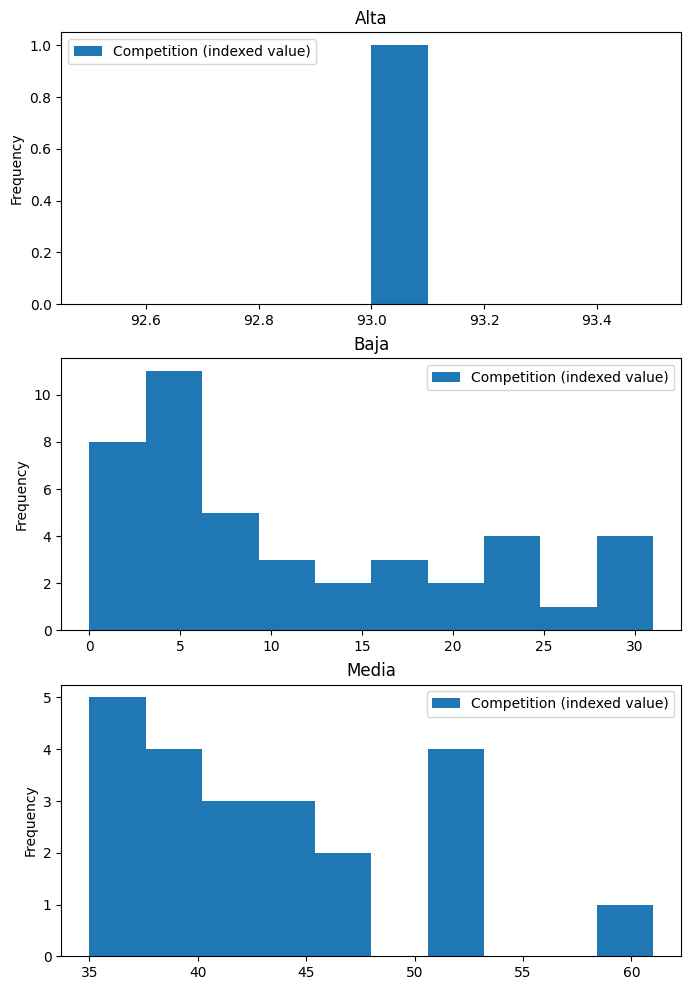

In [14]:
#Ahora realizaremos diferentes graficos para la visualizacion de nuestro dataframe

#Empezaremos realizando un grafico de frecuencia (Histograma)
ax = df.plot.hist(column="Competition (indexed value)", by="Competition", bins=10, figsize=(8,12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

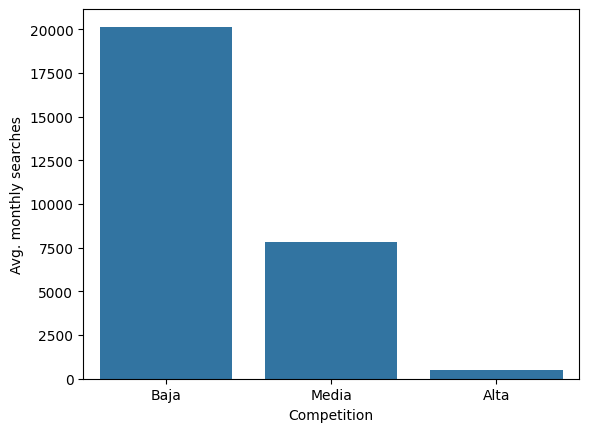

In [15]:
#Ahora vamos a graficar la suma de las busquedas promedio para cada nivel de competencia
sns.barplot(data=df, x="Competition",y="Avg. monthly searches", errorbar=None, estimator=sum)

In [ ]:
#RESUMEN

# Importacion de archivo .csv desde google ads en jupiter notebook
# Eliminacion de duplicados
# Eliminacion de valores nulos
# Componentes del Dataframa
# Graficar Dataframe limpio
# Desarrollar SQL dentro de Python (optimizacion trabajo) -->

SQL en Python

In [20]:
#Cambiar el nombre de las columnas las cuales tienen (" ") para evitar problemas con SQL
df = df.rename(columns={"Avg. monthly searche":"avg_searches","Competition (indexed value)":"competition_index"})

In [41]:
q = """
SELECT
    Keyword,
    avg_searches,
    Competition,
    competition_index
FROM df
WHERE avg_searches >= 500
"""

In [42]:
df_export = pysqldf(q)

PandaSQLException: (sqlite3.OperationalError) no such column: avg_searches
[SQL: 
SELECT
    Keyword,
    avg_searches,
    Competition,
    competition_index
FROM df
WHERE avg_searches >= 500
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)